In [11]:
%pylab inline
import pandas as pd
from sklearn import decomposition

df = pd.read_csv('data-set.csv',
                 index_col=0,
                 parse_dates=True,
                 infer_datetime_format=True,
                 dayfirst=True)

Xs = df[[u'AvgBlockSize', u'BitcoiDaysDestroyed', u'BitcoinDaysDestroyedCumulative',
         u'BitcoinDaysDestroyedMinMonth', u'BitcoinDaysDestroyedMinWeek',
         u'BitcoinDaysDestroyedMinYear', u'BlockSize', u'CostPerTransaction',
         u'CostPerTransactionPercent', u'Difficulty', u'EstimatedTransactionVolume',
         u'EstimatedTransactionVolumeUSD', u'EuroPriceInUSD', u'HashRate', u'MarketCap',
         u'MarketPrice', u'MedianConfirmationTime', u'MinersRevenue', u'NetworkDeficit',
         u'NumTransactions', u'NumTransactionsExcluding10', u'NumTransactionsExcluding100',
         u'NumTransactionsExcluding1000', u'NumTransactionsExcluding10000',
         u'NumTransactionsExcludingPopular', u'NumTransactionsPerBlock',
         u'NumTransactionsTotal', u'NumUniqueAdresses', u'OutputVolume', u'Open',
         u'High', u'Low', u'Close', u'Volume', u'Adj-Close', u'TotalBitcoins',
         u'TradeVolume', u'TransactionFees', u'TransactionFeesUSD',
         u'TxTradeRatio', u'WikipediaTrend']].values

ys = df[[u'NextDayPrice']].values

pca = decomposition.PCA()
pca.fit(Xs)

PCA(copy=True, n_components=None, whiten=False)

Populating the interactive namespace from numpy and matplotlib


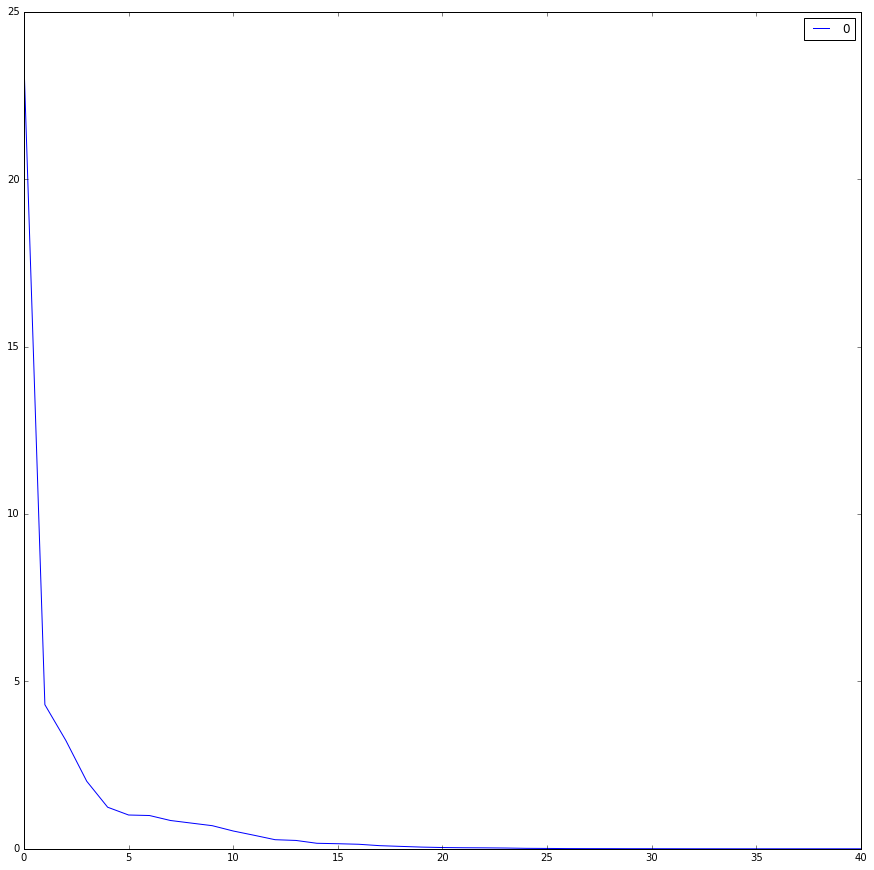

In [13]:
explained_variance_df = pd.DataFrame(data = pca.explained_variance_)
explained_variance_df.plot(figsize = (15,15))

In [48]:
i = np.identity(Xs.shape[1])
coef = pca.transform(i)
coef[:,:17]
df_coef_features = pd.DataFrame(coef[:,:17], index = df.columns[:-1])

In [67]:
for index,row in df_coef_features.iterrows():
    print np.linalg.norm(row)**2, row.name

0.0896845659678 AvgBlockSize
0.333263166283 BitcoiDaysDestroyed
0.0733870524562 BitcoinDaysDestroyedCumulative
0.325798808341 BitcoinDaysDestroyedMinMonth
0.335165170323 BitcoinDaysDestroyedMinWeek
0.981633436326 BitcoinDaysDestroyedMinYear
0.0829583163008 BlockSize
0.360451813539 CostPerTransaction
0.99995337354 CostPerTransactionPercent
0.316715853455 Difficulty
0.997143007516 EstimatedTransactionVolume
0.682535633041 EstimatedTransactionVolumeUSD
0.979093545827 EuroPriceInUSD
0.306811864837 HashRate
0.152377267419 MarketCap
0.165854649357 MarketPrice
0.954755351007 MedianConfirmationTime
0.196779714412 MinersRevenue
0.198091263399 NetworkDeficit
0.105950267391 NumTransactions
0.117760345163 NumTransactionsExcluding10
0.0983541777502 NumTransactionsExcluding100
0.0967882402226 NumTransactionsExcluding1000
0.0909279764382 NumTransactionsExcluding10000
0.0956424895112 NumTransactionsExcludingPopular
0.0896542766486 NumTransactionsPerBlock
0.0757628355749 NumTransactionsTotal
0.06783511